<a href="https://colab.research.google.com/github/meharkhanniazi/Farmdar-Projects/blob/main/PotatoDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt

In [4]:
imageSize = 256
batchSize = 32
epochs = 45
channelSize = 3

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dataSet = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PotatoDataset",
    batch_size = batchSize,
    image_size = (imageSize, imageSize),
    shuffle = True
)

Found 4491 files belonging to 5 classes.


In [8]:
classNames = dataSet.class_names

In [9]:
dataSet.file_paths

['/content/drive/MyDrive/PotatoDataset/Healthy/Healthy746.png',
 '/content/drive/MyDrive/PotatoDataset/Healthy/Healthy13.JPG',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus387.png',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus110.JPG',
 '/content/drive/MyDrive/PotatoDataset/Alternaria Solani/alternariasolani894.JPG',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus723.png',
 '/content/drive/MyDrive/PotatoDataset/Insect/Insect253.png',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/potato219105.png',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/potato20312.png',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus959.png',
 '/content/drive/MyDrive/PotatoDataset/Virus/Virus692.png',
 '/content/drive/MyDrive/PotatoDataset/Healthy/Healthy444.png',
 '/content/drive/MyDrive/PotatoDataset/Phytopthora Infestans/phytopthora341.JPG',
 '/content/drive/MyDrive/PotatoDataset/Insect/Insect263.png',
 '/content/drive/MyDrive/PotatoDataset/Alternaria Solani/alte

In [10]:
for imageBatch, labelBatch in dataSet.take(1):
  print(imageBatch.shape)
  print(labelBatch.numpy())

(32, 256, 256, 3)
[1 3 0 4 3 4 2 3 1 1 3 4 3 1 4 3 4 4 4 4 3 4 4 3 0 2 3 4 0 4 2 0]


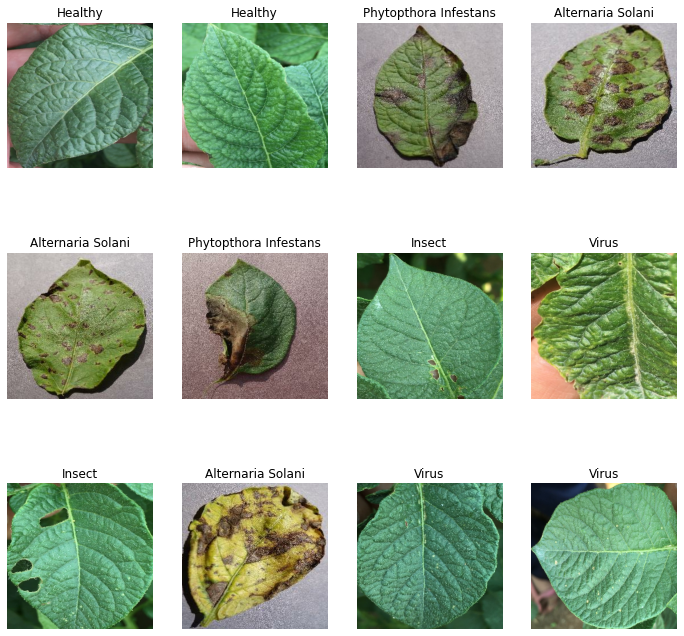

In [11]:
plt.figure(figsize=(12, 12))
for imageBatch, labelBatch in dataSet.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(imageBatch[i].numpy().astype("uint8"))
    plt.title(classNames[labelBatch[i]])
    plt.axis('off'
  )

In [46]:
trainingSize = 0.8
testSize = 0.1
validationSize = 0.1

In [47]:
trainingDataSet = dataSet.take(int(len(dataSet) * trainingSize))

In [48]:
trainingDataSet

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [49]:
len(trainingDataSet)

112

In [50]:
testDataSet = dataSet.take(int(len(dataSet) * testSize))

In [51]:
len(testDataSet)

14

In [52]:
validationDataSet = dataSet.take(int(len(dataSet) - (len(trainingDataSet) + len(testDataSet))))

In [53]:
len(validationDataSet)

15

In [54]:
def getDataSetPartitions(ds, shuffle=True, shuffleSize=1000, trainingSize=trainingSize, testSize=testSize, validationSize=validationSize):
  if shuffle:
    ds = ds.shuffle(shuffleSize, seed=12)
    trainingDataSet = dataSet.take(int(len(dataSet) * trainingSize))
    testDataSet = dataSet.take(int(len(dataSet) * testSize))
    validationDataSet = dataSet.take(int(len(dataSet) - (len(trainingDataSet) + len(testDataSet))))
    return trainingDataSet, testDataSet, validationDataSet

In [55]:
trainingDataSet, testDataSet, validationDataSet = getDataSetPartitions(dataSet)

In [56]:
len(trainingDataSet)

112

In [57]:
len(testDataSet)

14

In [58]:
len(validationDataSet)

15

In [60]:
trainingDataSet = trainingDataSet.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testDataSet = testDataSet.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validationDataSet = validationDataSet.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [62]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(imageSize, imageSize),
  layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [63]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

In [64]:
no_of_classes = len(classNames)
inputShape = (batchSize, imageSize, imageSize, channelSize)

In [65]:
model = models.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=inputShape),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
  layers.MaxPool2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation="relu"),
  layers.Dense(no_of_classes, activation="softmax")
])

In [66]:
model.build(input_shape=inputShape)

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_2 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [71]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
    trainingDataSet,
    epochs = epochs,
    batch_size = batchSize,
    verbose = 1,
    validation_data = validationDataSet
)

Epoch 1/45
